# <strong> Improving Loan Underwriting at Banca Massiccia </strong>

## <span style="color:red"> Business Case Definition </span>

Banca Massiccia, a large Italian bank making loans to business for many years, wants to optimize its underwriting using the power of machine learning. Their goal is to produce estimates of the `Probability of Default(PD)` for prospective borrowers 
on a new debt over the next 12 months so the bank can use risk-based pricing to set interest rates and underwriting fees for borrowers. 

`Probability of Default(PD)` measures the degree of likelihood that the borrower of a loan or debt will be unable to make the necessary scheduled repayments on the debt, thereby defaulting on the debt. Should the obligor be unable to pay, the debt is in default, and the lenders of the debt have legal avenues to attempt a recovery of the debt, or at least partial repayment of the entire debt. The higher the default probability a lender estimates a borrower to have, the higher the interest rate the lender will charge the borrower as compensation for bearing the higher default risk.

<!-- Probability of default models are categorized as `structural` or `empirical`. Structural models look at a borrower's ability to pay based on market data such as equity prices, market values of asset and liabilities, as well as the volatility of these variables, and hence are used predominantly to predict the probability of default of companies and countries, most applicable within the areas of commercial and industrial banking. In contrast, empirical models or credit scoring models are used to quantitatively determine the probability that a loan or loan holder will default, where the loan holder is an individual, by looking at historial portfolios of loans held, where individual characteristics are assessed (e.g., education level, debt to income ratio, and other variables), making this second approach more applicable to the retail banking sector. -->

## <span style="color:red"> Solution I - Logistic Regression </span>

Logistic regression aims to model the probability of an event occuring depending on the values of independent variables. These independent variables are the various categorical or numerical information available to us regarding the loan, and these variables can help us model the probability of the event (in our case, the probability of default). These variables are also called predictor variables.

Some examples of these preditor variables are provided below:
1. Structural details: legal structure of the company, headquarter city, sector code, debt components, asset components, income
2. Credit history: number of value of past delinquent loans, length of credit history
3. Behavioral data: spending pattern, repayment patterns

All these variables can be used as predictor variables to predict the probability of default. So, using logistic regression, we model the probability of default using other variables as described above.

The logistic regression model seeks to estimate that an event (default) will occur for a randomly selected observation versus the probability that the event does not occur. Suppose we have data for 1000 loans along with all the preditor variables and also whether the borrower defaulted on it or not. Here the probability of default is referred to as the response variable or the dependent variable. The default itself is a binary variable, that is, its value will be either 0 or 1 (0 is no default, 1 is default). 

#### <span> The Link Logit function </span>

A link function is simply a function of the mean of the response variable Y that we use as the response instead of Y itself. In our example, Y represents default. All that means is when Y is categorical, we use the logit of Y as the response in our regression equation instead of just Y:

$$
\begin{aligned}
Ln(\frac{P}{1-P}) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_k X_k
\end{aligned}
$$

The logit function is the natural log of the odds that Y equals one of the categories. For mathematical simplicity, we're going to assume Y has only two categories and code them as 0 and 1. The logit function is the inverse of the logistic transform. When the function's variable represents a probability p, the logit function gives the log-odds, or the logarithm of the odds p/(1-p). The log-odds score is typically the basis of the credit score used by banks and credit bureaus to rank people.

P is defined as the probability that $Y=1$ (representing default). So for example, those Xs could be specific risk factors, like income, credit history, long-term debt, current asset, and P would be the probability that a borrower defaults. $\beta_0$ is an intercept and $(\beta_1, \beta_2, ..., \beta_k)$ is a vector of coefficients, one for each predictor variables.

<!-- As mentional previously, structural models of probability of default are used to compute the PD of companies, applicable within the commercial and industrial banking. The dataset we have represents a sample of hundreds of thousands of previous company loans. The data shows whether each company had defaulted or not, as well as the specifics of each company's legal architecture, industry information, and financial statement, and so forth. The idea is to model these structural data to see which variables affect the default behavior of individual companies, using the Maximum Likelihood Estimation (MLE). The resulting model will help the bank compute the expected probability of default of a borrower company having specific charateristics.


The MLE approach applies a modified binary multivariate logistic analysis to model dependent variables to determine the expected probability of success of belonging to a certain group. For instance, given a set of independent variable (e.g., net profits, return on assets, financial income), we can model the probability of default using MLE. The mathematical intuition of binary multivariate logistic regression is as follows: -->

<!-- Given an example $x = (x_0, x_1, x_2, ... , x_n)$ from the input space $R^n$, logistic regression models the posterior probability of the positive class $C_1$ as:
$ p(C_1|x) = h(x|\beta_0, \beta) = \sigma (\beta_0 + \beta^Tx)$, where $\sigma(z)$ is the sigmoid or logistic function: $\sigma(z) = \frac{1}{1 + e^{-z}}$. For a dataset $D = \{x^{(i)}, y^{(i)}\}_{i=1}^{N}$ with binary labels $y^{(i)}$, the likelihood function can be expressed as: $L(\beta) = \prod_{i=1}^{N} [h(x^{(i)}|\beta_0, \beta)]^{y^(i)} [1-h(x^{(i)}|\beta_0, \beta)]^{1-y^(i)}$. Applying the negative logarithm to the likelihood function gives us the binary cross-entropy error: 

$-log L(\beta) = -\sum_{i=1}^{N} {y^{(i)} log\sigma(\beta_0 + \beta^Tx^{(i)}) + (1-y^{(i)})log(1-\sigma(\beta_0 + \beta^Tx^{(i)}))}$  -->


### Data Understanding & Feature Selection

The dataset comes from Banca Massiccia bank, and it is related to hundreds of thousands of previous loans from different borrowers. 

|Variable Name | Description|
| ------------ | ---------- |
|id            | firm identifier|
|HQ_cities | city of the main branch|
|legal_struct| legal structure|
|ateco_sector| industry sector code|
|fs_year| year of the financial statement|
|asst_intang_fixed| intangible assets|
|asst_tang_fixed| tangible assets|
|asst_fixed_fin|financial assets|
|asst_current|current assets|
|AR|account receivable|
|cash_and_equiv|cash & equivalent holdings|
|asst_tot| total assets|
|eqyt_tot|total equity|
|eqyt_corp_family_tot|total equity for entire group ("family")|
|liab_lt|long-term liabilities|
|liab_lt_emp|long-term liab to employees|
|debt_bank_st|short-term bank debt|
|debt_bank_lt|long-term bank debt|
|debt_fin_st|short-term debt other|
|debt_fin_lt|long-term debt other|
|AP_st|short-term accounts payable|
|AP_lt|long-term accounts payable|
|debt_st|short-term debt|
|debt_lt|long-term debt|
|rev_operating|operating revenue|
|COGS|cost of goods sold|
|prof_operating|operating profit|
|goodwill| goodwill|
|inc_financing|financial income|
|exp_financing|financial expense|
|prof_financing|financial profit|
|inc_extrard|extraordinary income|
|taxes|taxes|
|profit|net profit|
|days_rec|days receivable|
|ebitda|earnings before interest, taxes, depreciation, and amortization|
|roa|return on assets|
|roe|return on equity|
|wc_net|net working capital|
|margin_fin|equity - fixed assets|
|cf_operations|operating cashflow|

##### Some data conventions:
- Each row is one firm-year
- Annual observations
- 44 variables in total
- All quantities are reported in euro
- Only firms with >1.5MM in assets are included
- Only non-finance/insurance firms are included
- There is no information in the training data regarding defaults that occurred after 12/31/2012

#### Some understandings of these terminologies:

<span style="color:yellow"> Asset</span> is a resource owned or controlled by an individual, corporation, or government with the expectation that it will generate a positive economic benefit. Assets are generally classified in three ways:

* Convertibility: based on how easy it is to convert them into cash, assets can be classified into current assets (or short-term assets) or fixed assets (or long-term assets). Examples of current assets include cash and cash equivalents, short-term deposits, accounts receivables, inventory, marketable securities, and office supplies. Examples of fixed assets include land, building, machinery, equipment, patents, and trademarks.
* Physical Existence: based on their physical existence, assets are classified into tangible and intangible assets. Tangible assets include land, building, machinery, equipment, cash, office supplies, inventory, and marketable securities. Intangible assets include goodwill, patents, brand, copyrights, trademarks, licenses and permits, as well as corporate intellectual property.
* Usage: based on their usage or purpose, assets are classified as either operating assets or non-operating assets. Operating assets include cash, accounts receivable, inventory, building, machinery, equipment, patents, copyrights, and goodwill. Non-operating assets include short-term investments, marketable securities, vacant land, interest income from a fixed deposit

It is generally assumed that average asset correlation decreases with an increase in default probability.

<span style="color:yellow"> Liabilities</span> are debts owed by the business entity. Debts are one type of liability, but not all liabilities are debts. More specifically, debt refers to borrowed money, but liabilities can also include other types of financial obligations. Liabilities can be separated into three categories: short-term liabilities (or current liabilities), long-term liabilities (or non-current liabilities), and contigent liabilities. 

Current liabilities include wages payable, bills payable, dividends payable, short-term debts, accounts payable, income taxes payable. Non-current liabilities include long-term debts payable, deferred tax liabilities, capital lease.  Contigent liabilities include lawsuits, product warranties.

It is generally assumed that average liability correlation increases with an increase in default probability.

<span style="color:yellow"> Equity</span> represents the value that would be returned to a company's shareholders if all of the assets were liquidated and all of the company's debts were paid off. Shareholder equity = total assets - total liabilities

<span style="color:yellow"> Receivable days</span> is the average time a customer takes to pay back a business for products or services purchased. It helps companies estimate their cash flow and plan for short-term future expenses. A bigger number can point to better cash flow and a stronger balance sheet or income statement.

<span style="color:yellow">Net working capital</span> is the difference between a company's current assets and its current liabilities. It is commonly used measurement to gauge the company's liquidity and short-term financial health.

In [105]:
import pandas as pd
df = pd.read_csv("datasets/train.csv", index_col=0)
df.head()

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,1908.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0
18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,860.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,860.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,2023.0,...,3634.0,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0
22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,620.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0


In [106]:
df.shape
#The dataset includes 1,023,552 records and 43 fields.

(1023552, 43)

In [107]:
len(df["id"].unique())
#There are 237,711 unique borrowers

237711

#### <span> Feature Selection </span>

Predictions of default rates has been an objective of financial analysis for decades. Moody's, and Standard & Poor's have provided default ratings for almost a century. 

For example, Moody's is using this kind of EDF model in measuring credit risks, where EDF stands for Expected Default Frequency and is a measure of the probability that a firm will default over a specific period of time (typically one year).

According to the Moody's EDF model, a firm defaults when the market value of its assets (the value of the ongoing business) falls below its liabilities payable (the default point). There are three key values that determine a firm's EDF credit measure:
* the current market value of the firm (market value of assets)
* the level of the firm's obligations (default point)
* the vulnerability of the market value to large changes (asset volatility)

In Moody's, the default decision process in the structural model is depicted as:

<image src="images/default%20process%20in%20Moody's.png" width="600" height="400"/>

Except for these variables, other typical risk management metrics include:

* asset coverage ratio: $\frac{(book\_value\_of\_total\_assets - intangible\_assets) - (current\_liabilities - short\_term\_debt\_obligations)}{total\_debt\_outstanding}$, indicates how well a company can repay its debts by selling or liquidating its assets
* leverage ratio: $\frac{equity}{assets}$, evaluate a firm's financial structure and how it is financing operations
* ROA & growth of ROA: evaluate a firm's business prospects
* debt-service coverage ratio: $\frac{revenue - certain\_operating\_expenses}{current\_debt\_obligations}$, indicator of a firm's financial health, especially those who are highly levered and carrying a lot of debt
* current ratio: $\frac{current\_assets}{current\_liabilities}$, indicator of short-term liquidity

Now, let's get the target variable we want to predict first!

In [110]:
#Converting `def_date` to target variable `default` using the rule that, if `def_date` is not none and year of `def_date` $\leq$ 1 year + `stmt_date`, then we set `default` as 1, otherwise we set it as 0.
df["def_date"] = pd.to_datetime(df["def_date"])#convert `def_date` to datetime type
df["stmt_date"] = pd.to_datetime(df["stmt_date"])#convert `stmt_date` to datetime type

def myfunction(row):
    d1 = row["stmt_date"] + pd.offsets.DateOffset(years=1)
    d2 = pd.Timestamp(row["def_date"])

    if d2 <= d1:
        return 1
    return 0

#create a new column `default` as our target variable so that if default happens within 12 months from `stmt_date` then we set default=1 else default=0
df["default"] = df.apply(myfunction, axis=1) 

/var/folders/cf/3kbbttcn1g35qhk6ldvlg1lh0000gn/T/ipykernel_39124/334240757.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["def_date"] = pd.to_datetime(df["def_date"])#convert `def_date` to datetime type


In [111]:
df

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations,default
17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,1908.0,...,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0,0
18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,860.0,...,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0,0
19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,860.0,...,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0,0
21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,2023.0,...,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0,0
22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,620.0,...,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885791,92001230520,2011-12-31,52.0,SPA,93.0,NaT,2011,1498628.0,248233.0,163477.0,...,85977.0,-268445.0,-15.33,984567.0,2.16,-43.00,204689.0,-1286111.0,550755.0,0
4885792,92001230520,2008-12-31,52.0,SPA,93.0,NaT,2008,2465065.0,343015.0,43477.0,...,356795.0,6467.0,23.01,1746442.0,12.97,1.01,-472335.0,-2212557.0,945705.0,0
4885793,92001230520,2007-12-31,52.0,SPA,93.0,NaT,2007,2375606.0,261775.0,28642.0,...,168871.0,3893.0,33.64,1539957.0,6.15,0.62,-78424.0,-2033489.0,1166064.0,0
4885815,94111750108,2010-12-31,10.0,SRL,68.0,NaT,2010,2973.0,1131586.0,264600.0,...,-4793.0,-4793.0,NaN,-4795.0,-0.31,-1.85,148203.0,-1140392.0,-4793.0,0


Now we have column `default` as our target variable. If `default` equals 0, the borrower didn't default on that year, otherwise we set the borrower as default borrower.

Based on the financial intuition and the dataset we have, we decided to use the following metrics:

Independent Vars:

- Liquidity metrics:
  * `wc_net`               = net working capital, which represents the difference between current assets and current liabilities, is a measure of a firm's liquidity and short-term financial health
  * `days_receivable`      = receivable days, is the average time a customer takes to pay back a business for product or service purchased. It helps companies estimate their cash flow and plan for short-term future expenses.


- Profitability metrics:
  * `gross_margin` = operating revenue - COGS, measuring the amount of money a company retains after incurring the direct costs associated with producing the goods it sells and the services it provides. The higher the gross margin, the more capital a company retains to pay other costs or debt obligations.
  * `roa`          = net income / total assets, indicates a company's profitability in relation to its total assets
  * `roe`          = net income / total equities, a measure of a company's net income divided by its shareholders' equity and is a gauge of a corporation's profitability and how efficiently it generates those profits


- Efficiency metrics:
  * `payable_turnover_ratio` = COGS / Average accounts payable, measures how quickly a business makes payments to creditors and suppliers that extend lines of credit.


 - Leverage metrics:
    * `leverage_ratio`              = total equities / total assets, measures the ability of a company to meet its financial obligations.
    * `debt_service_coverage_ratio` = (revenue - expense) / short-term debt, a measure of the cash flow available to pay current debt obligations


Dependent Var:

* `default`

### Data Preprocessing
#### Feature generation

In [122]:
##get the profitability metrics
df["gross_margin"] = df["rev_operating"] - df["COGS"]

##get the efficiency metrics
df["payable_turnover_ratio"] = df["COGS"] / df["AP_st"]

##get the leverage ratio
df["leverage_ratio"] = df["eqty_tot"] / df["asst_tot"]
df["debt_service_coverage_ratio"] = (df["rev_operating"] - df["exp_financing"]) / df["debt_st"]

In [141]:
#extract the feature matrix from the original dataframe 
features = ["wc_net", "days_rec", "gross_margin", "roa", "roe", "payable_turnover_ratio", "leverage_ratio", "debt_service_coverage_ratio", "default"]
s1_df = df[features]
s1_df

,wc_net,days_rec,gross_margin,roa,roe,payable_turnover_ratio,leverage_ratio,debt_service_coverage_ratio,default
17,496258.0,NaN,-74121.0,-3.81,-28.03,3.584153,0.148942,2.202560,0
18,97952.0,NaN,-57413.0,-2.76,NaN,9.228543,-0.017968,1.747735,0
19,-210671.0,NaN,-42826.0,-2.17,NaN,7.351892,-0.022845,0.730635,0
21,367892.0,NaN,-243357.0,-12.99,NaN,2.231620,0.020927,0.835090,0
22,-317007.0,NaN,109754.0,6.20,52.43,17.736361,0.039602,2.528919,0
...,...,...,...,...,...,...,...,...,...
4885791,204689.0,-15.33,165367.0,2.16,-43.00,9.058419,0.081611,3.966301,0
4885792,-472335.0,23.01,807204.0,12.97,1.01,14.949654,0.102669,5.025756,0
4885793,-78424.0,33.64,377786.0,6.15,0.62,15.337272,0.102916,4.348383,0
4885815,148203.0,NaN,-4795.0,-0.31,-1.85,11.723716,0.167187,0.000000,0


#### Missing values

In [142]:
s1_df.isna().sum()

wc_net                              6
days_rec                       740211
gross_margin                      177
roa                                27
roe                             72937
payable_turnover_ratio         120854
leverage_ratio                      1
debt_service_coverage_ratio       669
default                             0
dtype: int64

In [143]:
#since there are 70%+ missing values for `days_rec`, we will discard this feature 
s1_df = s1_df.drop(columns=["days_rec"])

#and we will dropping rows containing missing values
s1_df = s1_df.dropna()

#drop rows containing infinities
import numpy as np
s1_df = s1_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [144]:
s1_df

,wc_net,gross_margin,roa,roe,payable_turnover_ratio,leverage_ratio,debt_service_coverage_ratio,default
17,496258.0,-74121.0,-3.81,-28.03,3.584153,0.148942,2.202560,0
22,-317007.0,109754.0,6.20,52.43,17.736361,0.039602,2.528919,0
23,398756.0,-77516.0,-4.08,-22.52,7.114708,0.195651,2.601947,0
35,181895.0,70918.0,4.25,6.33,4.621118,0.429923,2.955242,0
36,178021.0,32731.0,2.11,1.21,2.942513,0.432282,2.323877,0
...,...,...,...,...,...,...,...,...
4885791,204689.0,165367.0,2.16,-43.00,9.058419,0.081611,3.966301,0
4885792,-472335.0,807204.0,12.97,1.01,14.949654,0.102669,5.025756,0
4885793,-78424.0,377786.0,6.15,0.62,15.337272,0.102916,4.348383,0
4885815,148203.0,-4795.0,-0.31,-1.85,11.723716,0.167187,0.000000,0


Now we have 811168 records for building and validating the model!

#### Imbalanced dataset (Subsampling)

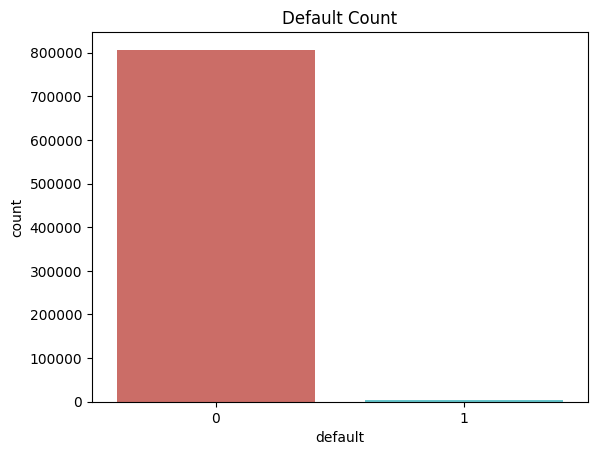

In [145]:
#number of defaulted borrowers vs. non-defaulted borrowers
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "default", data=s1_df, palette="hls")
plt.title("Default Count")
plt.show()

<strong> Note:</strong>  Notice how imbalanced is our dataset. Most of the transactions are non-default. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will assume that most transactions are non-default. But we don't want our model to assume, we want our model to detect patterns that give signs of default.

Now let's create a subsample of the dataframe in order to have an equal amount of default and non-default cases, helping our algorithms better understand patterns that determines whether a transaction will default or not.

In [146]:
#split data into train/test datasets
from sklearn.model_selection import train_test_split

independent_vars = s1_df[["wc_net", "gross_margin", "roa", "roe", "payable_turnover_ratio", "leverage_ratio", "debt_service_coverage_ratio"]]
dependent_var = s1_df[["default"]]

X_train, X_test, y_train, y_test = train_test_split(independent_vars, dependent_var, test_size=0.2, random_state=0)

In [147]:
#scale the dataset
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() #robust to outliers

scaled_X_train = pd.DataFrame(rob_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
scaled_X_test  = pd.DataFrame(rob_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

Steps of subsampling:

* Determine how imbalanced our training dataset is.
* Bring the non-default transactions to the same amount as default transactions (assuming we want a 50/50 ratio).

Note: The main issue wil random under-sampling is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss. 

In [155]:
train_df = scaled_X_train.reset_index().merge(y_train.reset_index(), how="left", on="index")

#default:  3364
#non-default: 3364
default_df = train_df[train_df["default"]==1]
non_default_df = train_df[train_df["default"]==0].sample(n=3364, random_state=1)

down_train_df = pd.concat([default_df, non_default_df])
down_train_df = down_train_df.sample(frac=1, random_state=42)#shuffle the data
down_train_df

,index,wc_net,gross_margin,roa,roe,payable_turnover_ratio,leverage_ratio,debt_service_coverage_ratio,default
358240,1545646,4.208208,3.005947,1.292731,3.072973,0.305944,-0.311039,0.187147,0
26144,4576540,0.047760,-1.574378,-3.025540,-6.737162,0.380151,-0.032371,0.209281,1
127836,1570000,-0.113540,-5.986977,-3.282908,-8.169595,1.997117,-0.300518,0.724160,0
364209,777850,0.299208,-0.221872,-0.288802,-0.145270,0.375382,0.932516,1.910083,0
566401,4462674,13.213935,-4.514522,-1.536346,4.741216,3.339584,1.694649,-0.767896,1
...,...,...,...,...,...,...,...,...,...
149498,4246578,0.503682,2.687742,1.007859,0.412838,0.030616,-0.270149,0.446517,0
373184,2264467,-0.630003,-0.008227,0.567780,-0.045946,0.026585,-0.284163,0.000438,0
428538,3965176,0.318719,0.341249,0.491159,0.183108,0.024424,1.027431,1.213926,0
533312,602330,-0.103952,0.789296,1.220039,-0.537162,0.118560,-0.312182,-0.055720,0


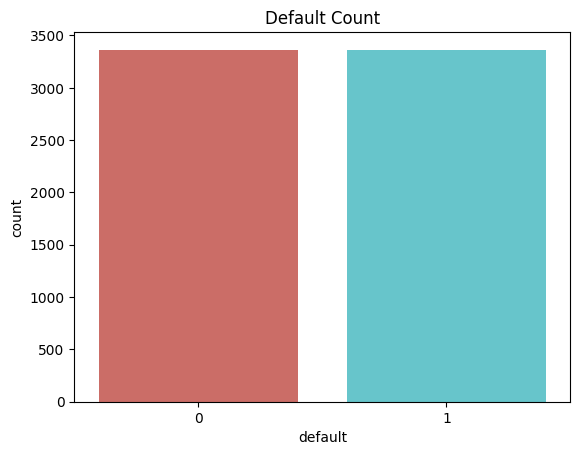

In [161]:
#number of defaulted borrowers vs. non-defaulted borrowers
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "default", data=down_train_df, palette="hls")
plt.title("Default Count")
plt.show()

Now we have our dataframe evenly balanced, we can go further with our analysis.

#### Exploratory Data Analysis (Subsampling)

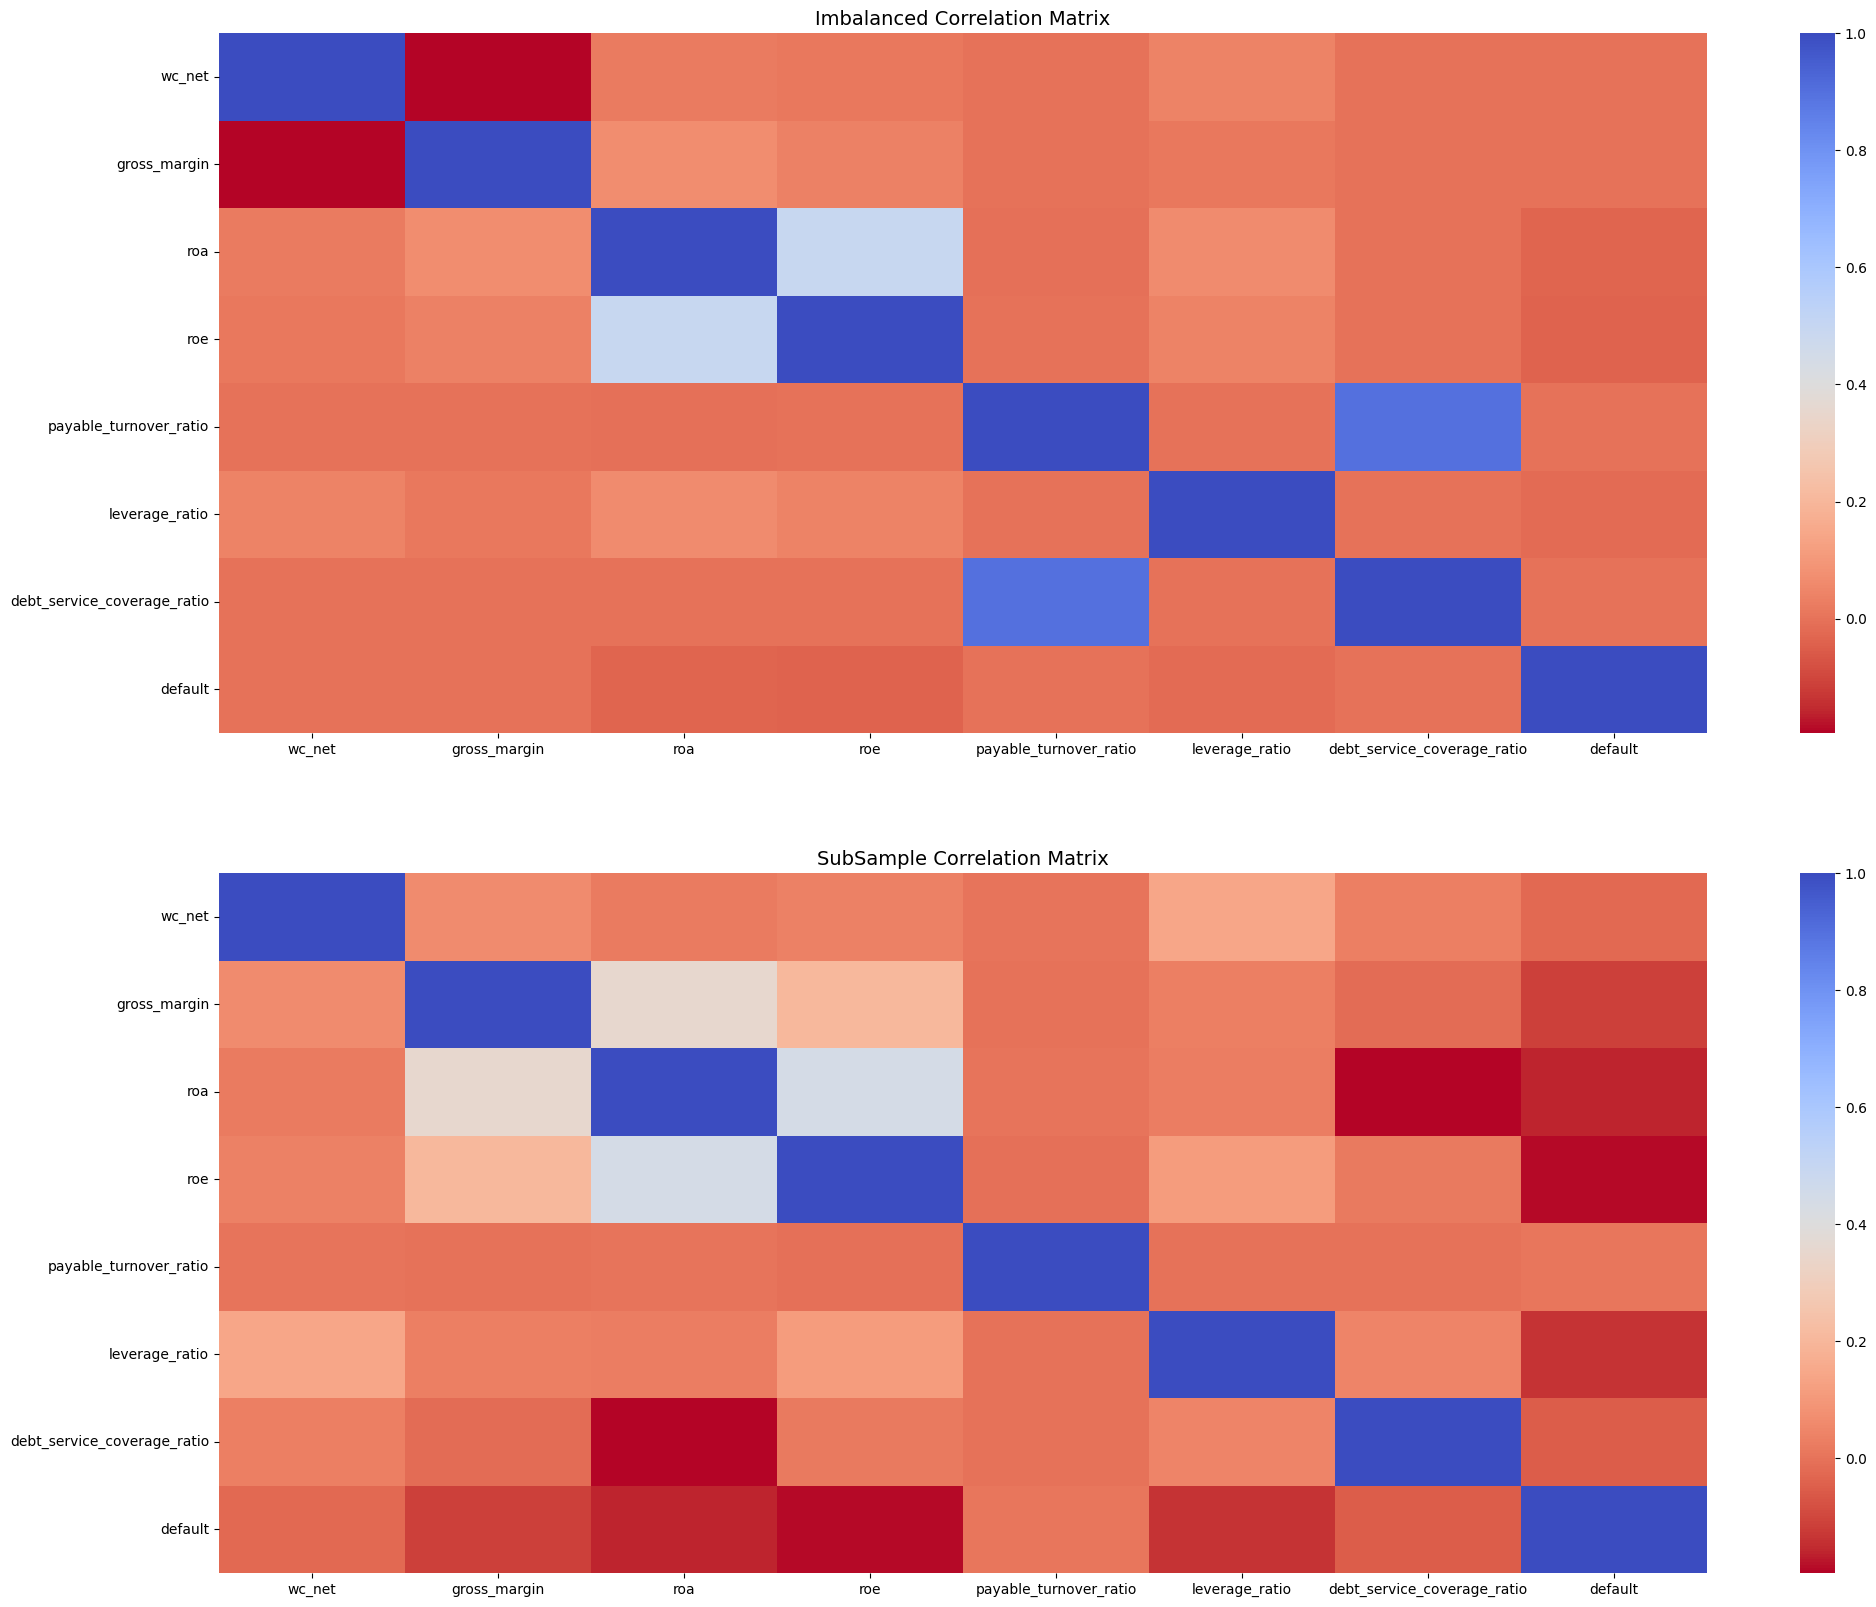

In [162]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = train_df.drop(columns=["index"]).corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = down_train_df.drop(columns=["index"]).corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

Summary and explanation:

* Negative correlations:   `gross_margin`, `roa`, `roe`, and `leverage_ratio`(equity-to-asset ratio).

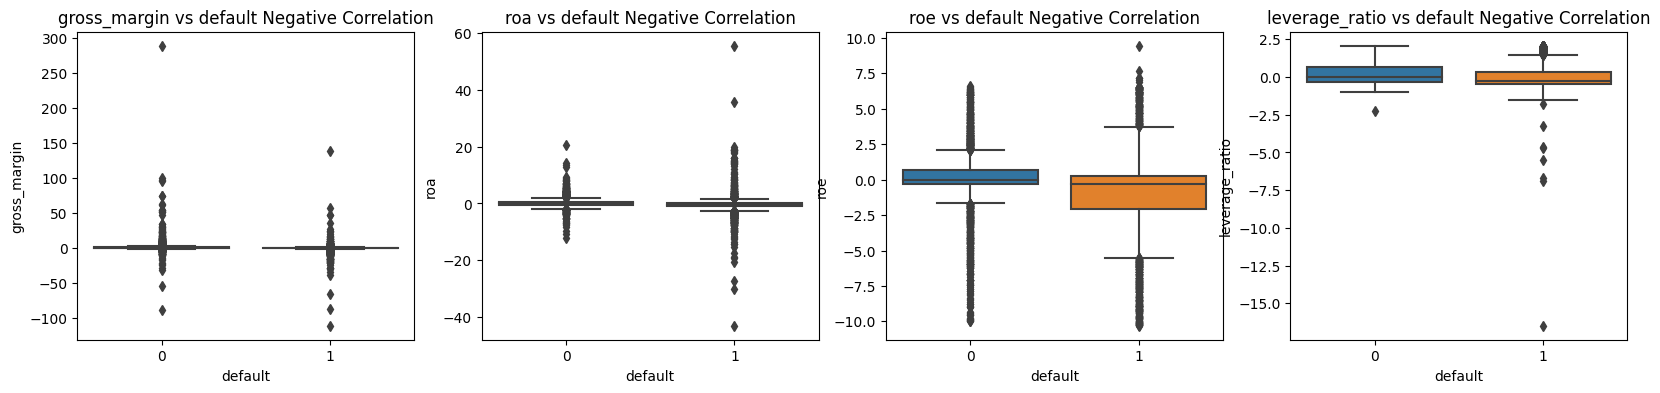

In [165]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="default", y="gross_margin", data=down_train_df, ax=axes[0])
axes[0].set_title('gross_margin vs default Negative Correlation')

sns.boxplot(x="default", y="roa", data=down_train_df, ax=axes[1])
axes[1].set_title('roa vs default Negative Correlation')


sns.boxplot(x="default", y="roe", data=down_train_df, ax=axes[2])
axes[2].set_title('roe vs default Negative Correlation')


sns.boxplot(x="default", y="leverage_ratio", data=down_train_df, ax=axes[3])
axes[3].set_title('leverage_ratio vs default Negative Correlation')

plt.show()

#### Classifiers (Subsampling)

In this section we will train three types of classifiers and decide which classifier will be more effective in detecting default loans. 

##### Implement the model

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

X = down_train_df.drop(columns=["index", "default"])
y = down_train_df[["default"]]

for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Classifiers:  LogisticRegression Has a training score of 64.0 % accuracy score


/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classifiers:  KNeighborsClassifier Has a training score of 64.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 61.0 % accuracy score


Summary:

* Logistic regresison has a training score of 64.0 % accuracy;
* KNeighborsClassifier has a training score of 64.0 % accuracy;
* DecisionTreeClassifier has a training score of 61.0 % accuracy.


##### GridSearch for Best Params (Subsampling)

In [188]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X, y)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X, y)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X, y)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was e

##### Evaluation (Subsampling)

In [243]:
from sklearn.model_selection import cross_val_predict

#make predictions on test set
log_reg_pred = log_reg.predict_proba(scaled_X_test)
log_reg_pred = [probs[1] for probs in log_reg_pred]

knears_pred  = knears_neighbors.predict_proba(scaled_X_test)
knears_pred = [probs[1] for probs in knears_pred]

tree_pred    = tree_clf.predict_proba(scaled_X_test)
tree_pred = [probs[1] for probs in tree_pred]

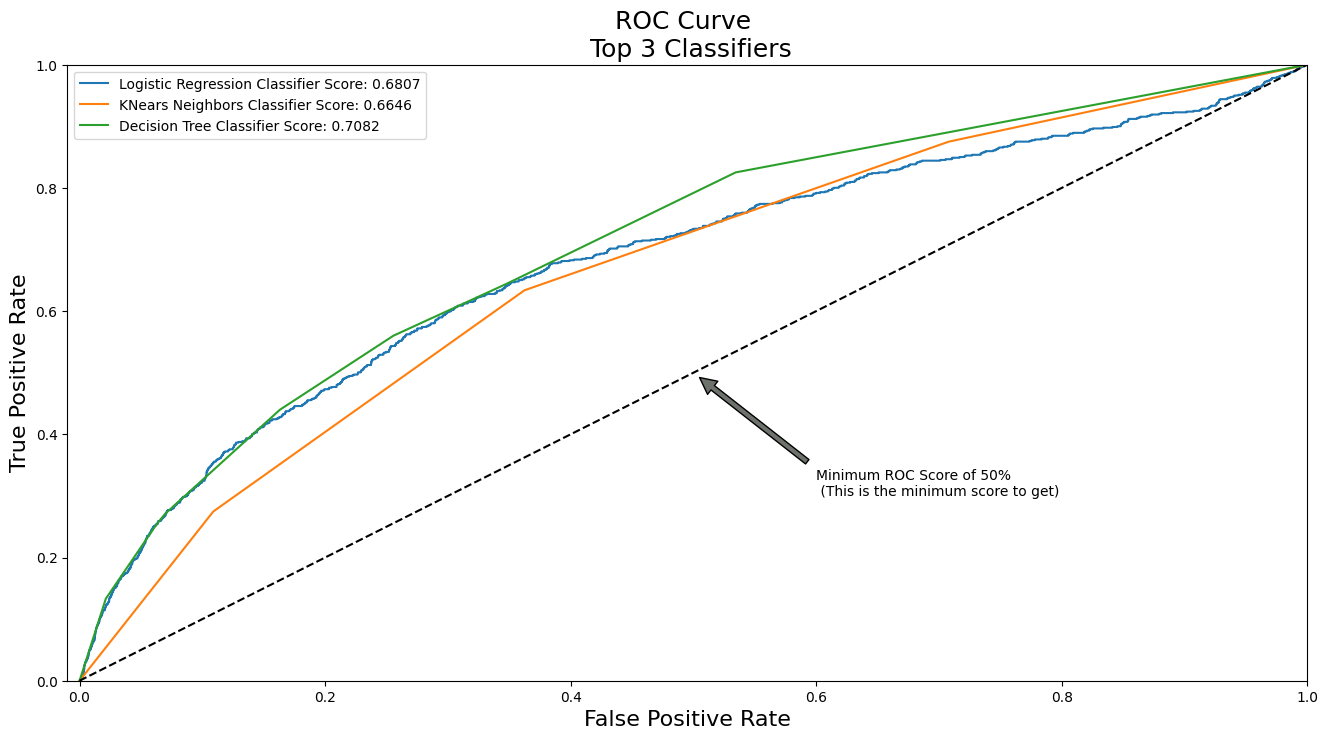

In [245]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

AUC is a scale-invariant metric provides aggregate measure of performance across all possible classification thresholds. According to the plot above, Decision tree provides the highest performance, logistic regression and KNears neighbors followed.

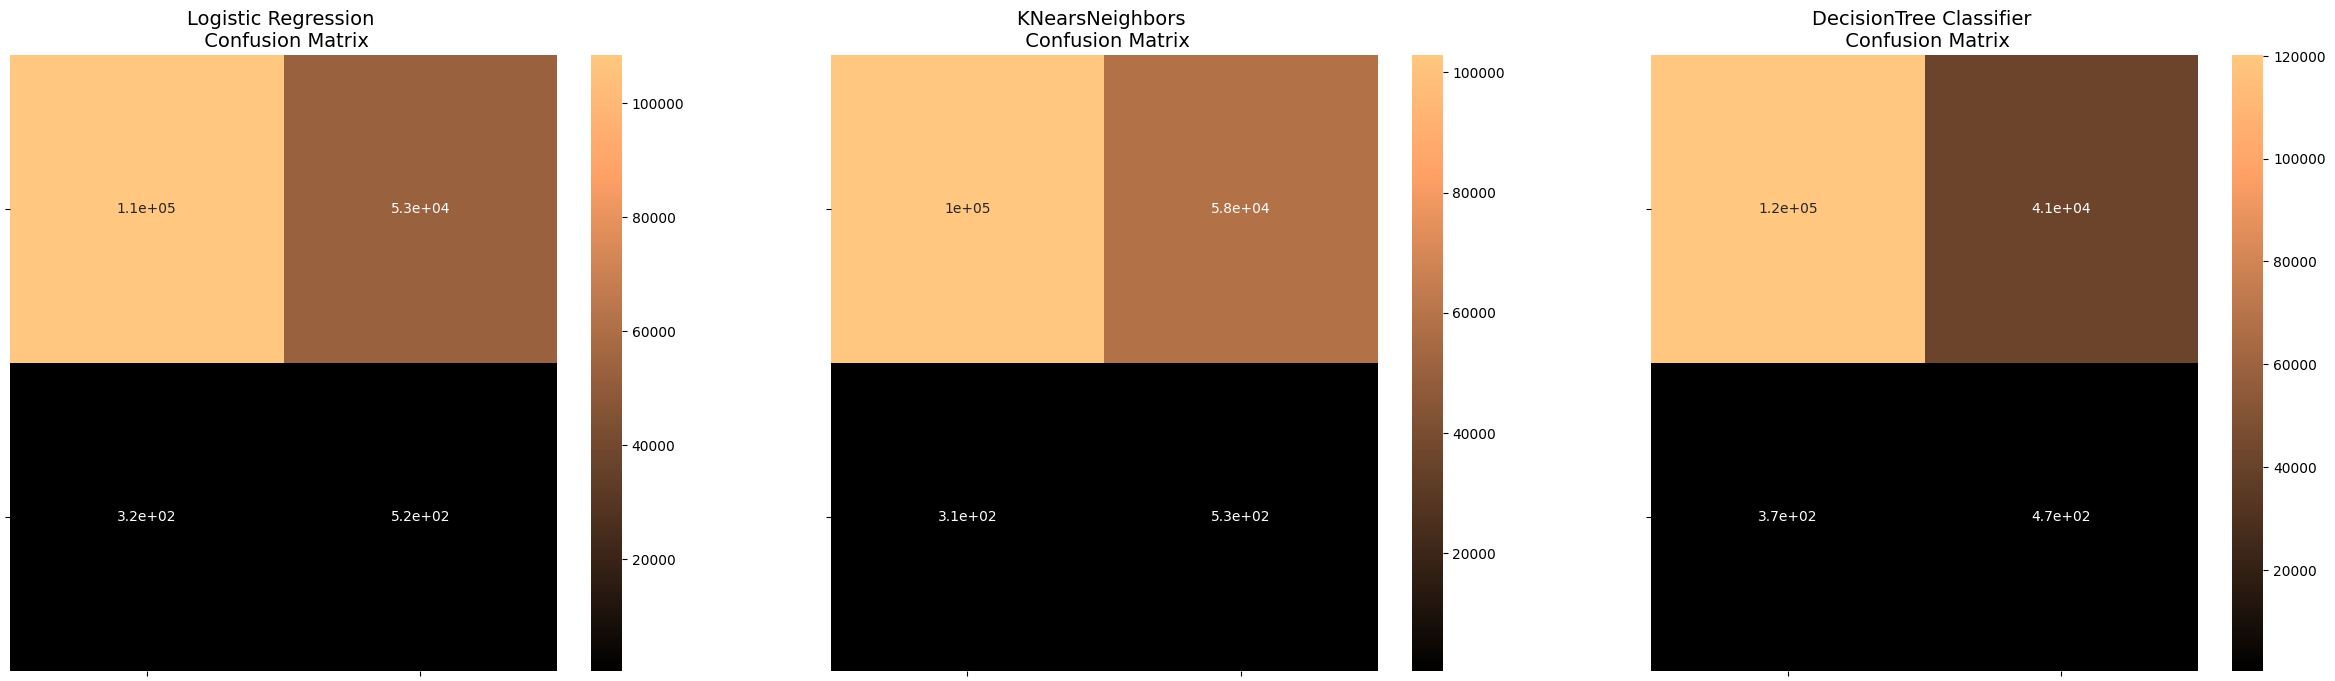

In [197]:
from sklearn.metrics import confusion_matrix

log_reg_cf = confusion_matrix(y_test, log_reg.predict(scaled_X_test))
kneighbors_cf = confusion_matrix(y_test, knears_neighbors.predict(scaled_X_test))
tree_cf = confusion_matrix(y_test, tree_clf.predict(scaled_X_test))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30, 8))

sns.heatmap(log_reg_cf, ax=ax1, annot=True, cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax2, annot=True, cmap=plt.cm.copper)
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax3, annot=True, cmap=plt.cm.copper)
ax3.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax3.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax3.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [198]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, log_reg.predict(scaled_X_test)))

print('KNears Neighbors:')
print(classification_report(y_test, knears_neighbors.predict(scaled_X_test)))

print('Support Vector Classifier:')
print(classification_report(y_test, tree_clf.predict(scaled_X_test)))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80    161393
           1       0.01      0.62      0.02       841

    accuracy                           0.67    162234
   macro avg       0.50      0.65      0.41    162234
weighted avg       0.99      0.67      0.80    162234

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78    161393
           1       0.01      0.63      0.02       841

    accuracy                           0.64    162234
   macro avg       0.50      0.64      0.40    162234
weighted avg       0.99      0.64      0.77    162234

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    161393
           1       0.01      0.56      0.02       841

    accuracy                           0.74    162234
   macro avg       0.50      0.65      0.44    162234
weighted

#### Imbalanced dataset (Oversampling)
SMOTE Technique

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike random undersampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

In [199]:
import imblearn 
from imblearn.over_sampling import SMOTE 

oversample = SMOTE()
up_X, up_y = oversample.fit_resample(train_df.drop(columns=["index", "default"]), train_df[["default"]])

#### Classifiers (Oversampling)

In this section, we will be training the three models on the oversampled data.

##### Implement the model

In [201]:
#logistic regression
log_reg_up = LogisticRegression().fit(up_X, up_y)
training_score = cross_val_score(log_reg_up, up_X, up_y, cv=5)
print("Classifiers: ", log_reg_up.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

#Knearest neighbors regression
knear_up = KNeighborsClassifier().fit(up_X, up_y)
training_score = cross_val_score(knear_up, up_X, up_y, cv=5)
print("Classifiers: ", knear_up.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

#Decision tree regression
tree_up = DecisionTreeClassifier().fit(up_X, up_y)
training_score = cross_val_score(tree_up, up_X, up_y, cv=5)
print("Classifiers: ", tree_up.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Classifiers:  LogisticRegression has a training score of 65.0 % accuracy score


/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array 

Classifiers:  KNeighborsClassifier has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 96.0 % accuracy score


Summary:

* Logistic regresison has a training score of 65.0 % accuracy;
* KNeighborsClassifier has a training score of 96.0 % accuracy;
* DecisionTreeClassifier has a training score of 96.0 % accuracy.

##### Evaluation (Oversampling)

In [211]:
from sklearn.model_selection import cross_val_predict

#make predictions on test set
log_reg_pred_up = log_reg_up.predict_proba(scaled_X_test)
log_reg_pred_up = [probs[1] for probs in log_reg_pred_up]

knears_pred_up  = knear_up.predict_proba(scaled_X_test)
knears_pred_up = [probs[1] for probs in knears_pred_up]

tree_pred_up    = tree_up.predict_proba(scaled_X_test)
tree_pred_up = [probs[1] for probs in tree_pred_up]

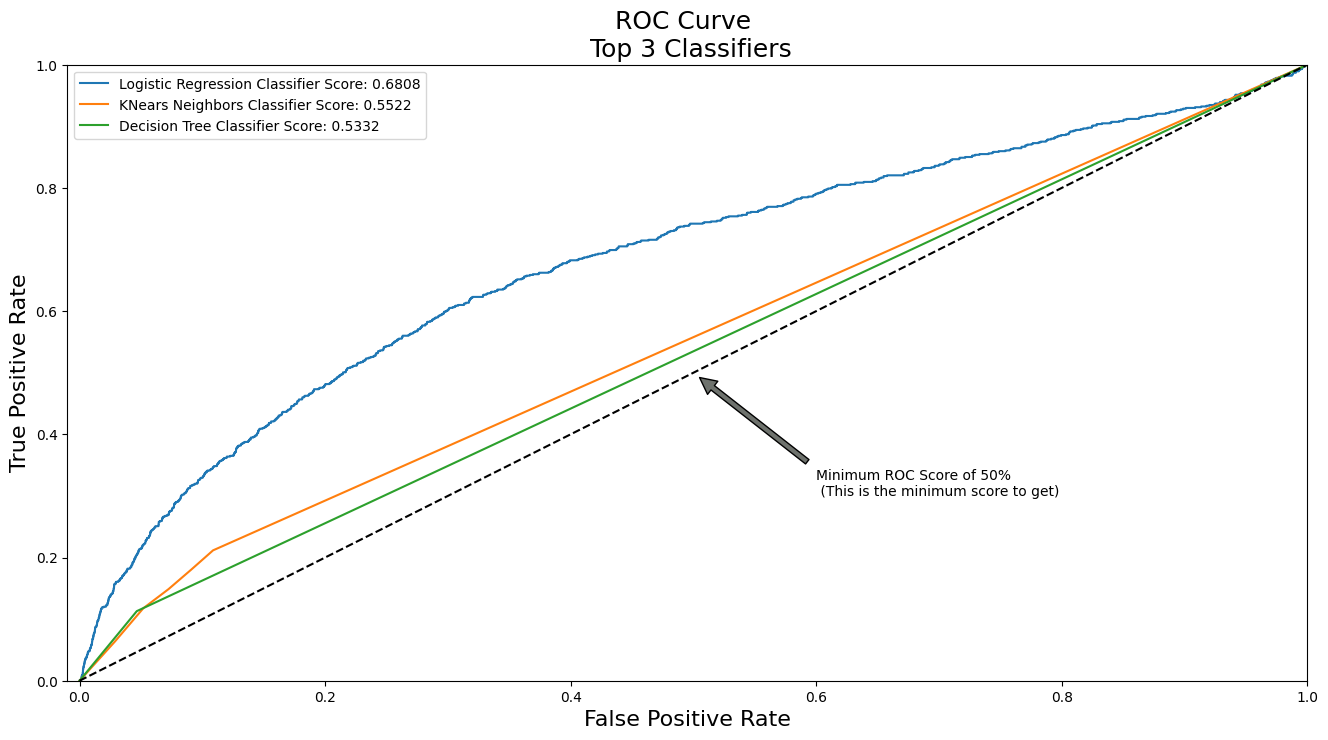

In [240]:
log_fpr_up, log_tpr_up, log_thresold_up = roc_curve(y_test, log_reg_pred_up)
knear_fpr_up, knear_tpr_up, knear_threshold_up = roc_curve(y_test, knears_pred_up)
tree_fpr_up, tree_tpr_up, tree_threshold_up = roc_curve(y_test, tree_pred_up)

def graph_roc_curve_multiple(log_fpr_up, log_tpr_up, knear_fpr_up, knear_tpr_up, tree_fpr_up, tree_tpr_up):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr_up, log_tpr_up, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred_up)))
    plt.plot(knear_fpr_up, knear_tpr_up, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred_up)))
    plt.plot(tree_fpr_up, tree_tpr_up, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred_up)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr_up, log_tpr_up, knear_fpr_up, knear_tpr_up, tree_fpr_up, tree_tpr_up)
plt.show()

According to the plot above, logistic regression provides the highest performance, KNN and Decision tree followed.

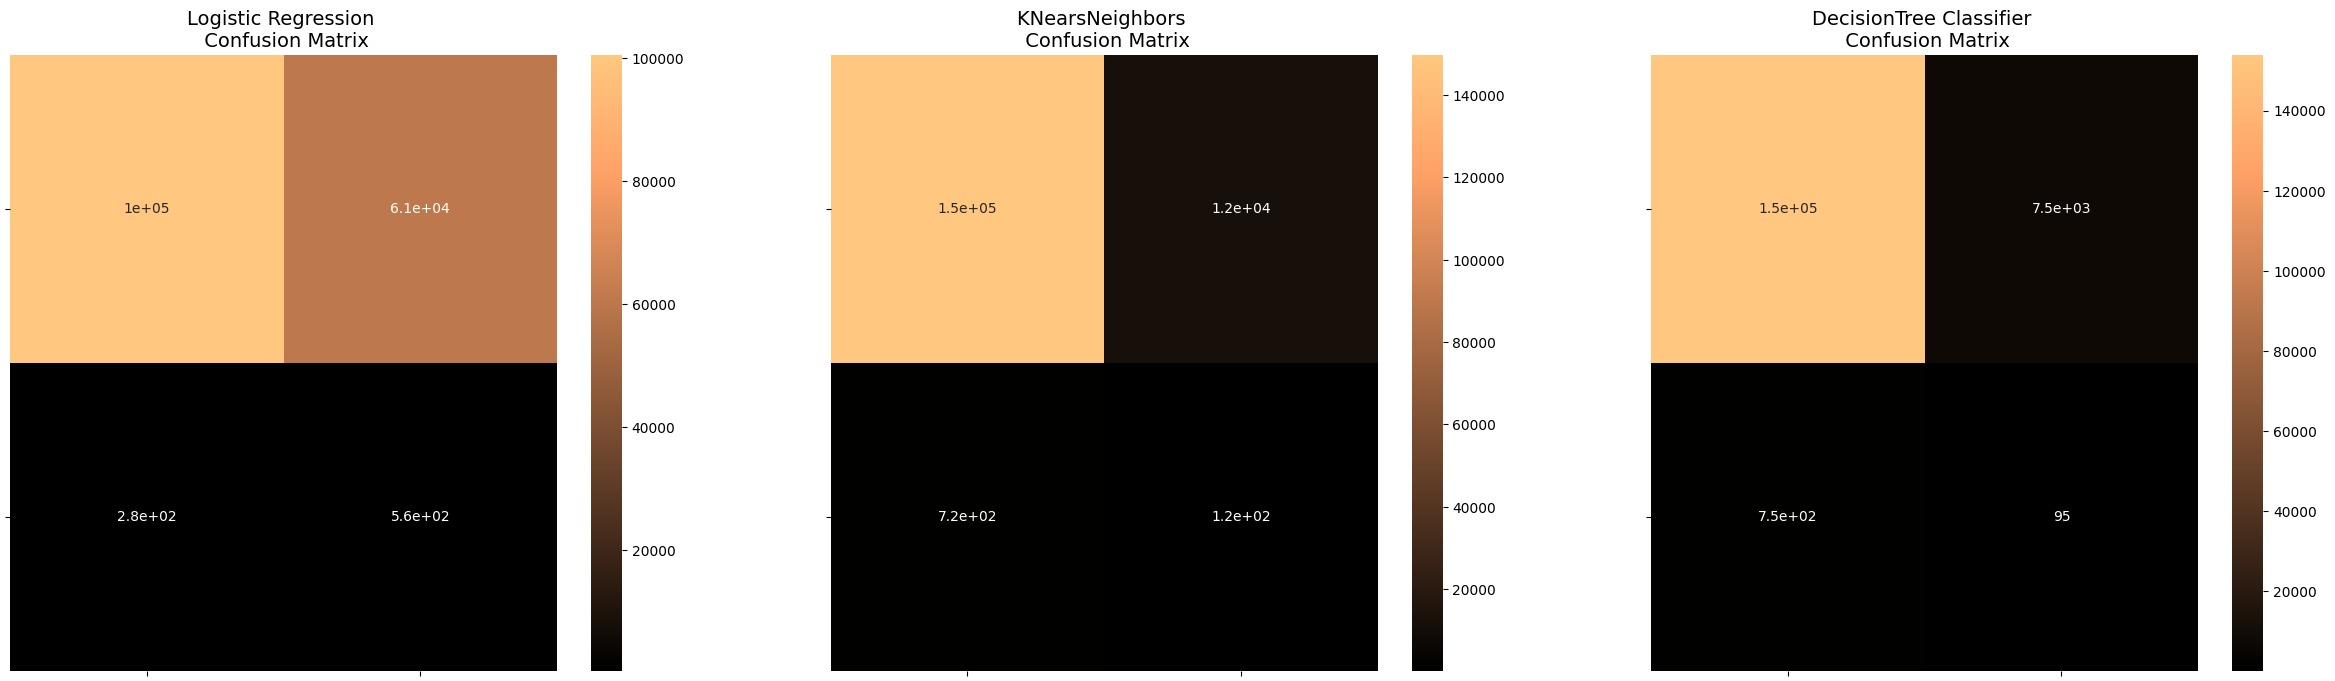

In [213]:
from sklearn.metrics import confusion_matrix

log_reg_cf_up = confusion_matrix(y_test, log_reg_up.predict(scaled_X_test))
kneighbors_cf_up = confusion_matrix(y_test, knear_up.predict(scaled_X_test))
tree_cf_up = confusion_matrix(y_test, tree_up.predict(scaled_X_test))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30, 8))

sns.heatmap(log_reg_cf_up, ax=ax1, annot=True, cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf_up, ax=ax2, annot=True, cmap=plt.cm.copper)
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf_up, ax=ax3, annot=True, cmap=plt.cm.copper)
ax3.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax3.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax3.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [215]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, log_reg_up.predict(scaled_X_test)))

print('KNears Neighbors:')
print(classification_report(y_test, knear_up.predict(scaled_X_test)))

print('Support Vector Classifier:')
print(classification_report(y_test, tree_up.predict(scaled_X_test)))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77    161393
           1       0.01      0.66      0.02       841

    accuracy                           0.62    162234
   macro avg       0.50      0.64      0.39    162234
weighted avg       0.99      0.62      0.76    162234

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    161393
           1       0.01      0.15      0.02       841

    accuracy                           0.92    162234
   macro avg       0.50      0.54      0.49    162234
weighted avg       0.99      0.92      0.96    162234

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    161393
           1       0.01      0.11      0.02       841

    accuracy                           0.95    162234
   macro avg       0.50      0.53      0.50    162234
weighted

## <span style="color:red"> Solution II - Neural Networks </span>
#### Test Random Undersampling Data vs. Oversampling Data

Logistic regression is the industry standard in credit risk modeling. Regulatory requirements for model explainability have halted the implementation of more advanced, non-linear machine learning algorithm, even though more accurate predictions would benefit consumers and banks alike. ANN models are certainly some of the most prominent non-linear algorithms. To this extent, we develop an ANN model for predicting borrowers' PD as we believe that it has the potential to capture the complex dependencies between input features and target labels on a large amount of data.

In this section, we will implement a simple Neural Network (with one hidden layer) on both undersampling and oversampling data in order to see which model will have a better accuracy for detecting default and non-default behaviors.

#### ANN with Undersampling Data

##### Model Compiling & Fitting
 

In [223]:
#define and compile the model
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

undersample_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 32)                256       
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [224]:
undersample_model.compile(Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
undersample_model.fit(X, y, validation_split=0.2, batch_size=25, epochs=50, shuffle=True, verbose=2)

Epoch 1/50


/Users/opal/Library/Python/3.8/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


216/216 - 1s - loss: 0.9628 - accuracy: 0.5933 - val_loss: 0.7339 - val_accuracy: 0.6174 - 1s/epoch - 5ms/step
Epoch 2/50
216/216 - 0s - loss: 0.8718 - accuracy: 0.6163 - val_loss: 0.6810 - val_accuracy: 0.6226 - 410ms/epoch - 2ms/step
Epoch 3/50
216/216 - 0s - loss: 0.7105 - accuracy: 0.6260 - val_loss: 0.6726 - val_accuracy: 0.6434 - 350ms/epoch - 2ms/step
Epoch 4/50
216/216 - 0s - loss: 0.8752 - accuracy: 0.6275 - val_loss: 0.7032 - val_accuracy: 0.6434 - 356ms/epoch - 2ms/step
Epoch 5/50
216/216 - 0s - loss: 0.9236 - accuracy: 0.6382 - val_loss: 0.6572 - val_accuracy: 0.6397 - 494ms/epoch - 2ms/step
Epoch 6/50
216/216 - 1s - loss: 0.7591 - accuracy: 0.6423 - val_loss: 0.7020 - val_accuracy: 0.6501 - 559ms/epoch - 3ms/step
Epoch 7/50
216/216 - 0s - loss: 0.9949 - accuracy: 0.6390 - val_loss: 0.6591 - val_accuracy: 0.6545 - 381ms/epoch - 2ms/step
Epoch 8/50
216/216 - 0s - loss: 0.7191 - accuracy: 0.6507 - val_loss: 0.6457 - val_accuracy: 0.6701 - 272ms/epoch - 1ms/step
Epoch 9/50
216

##### Evaluation

In [225]:
#make predictions
undersample_predictions = undersample_model.predict(scaled_X_test, batch_size=200, verbose=0)#probs
undersample_default_predictions = np.argmax(undersample_predictions,axis=1)#classes

Confusion matrix, without normalization
[[109514  51879]
 [   293    548]]
Confusion matrix, without normalization
[[161393      0]
 [     0    841]]


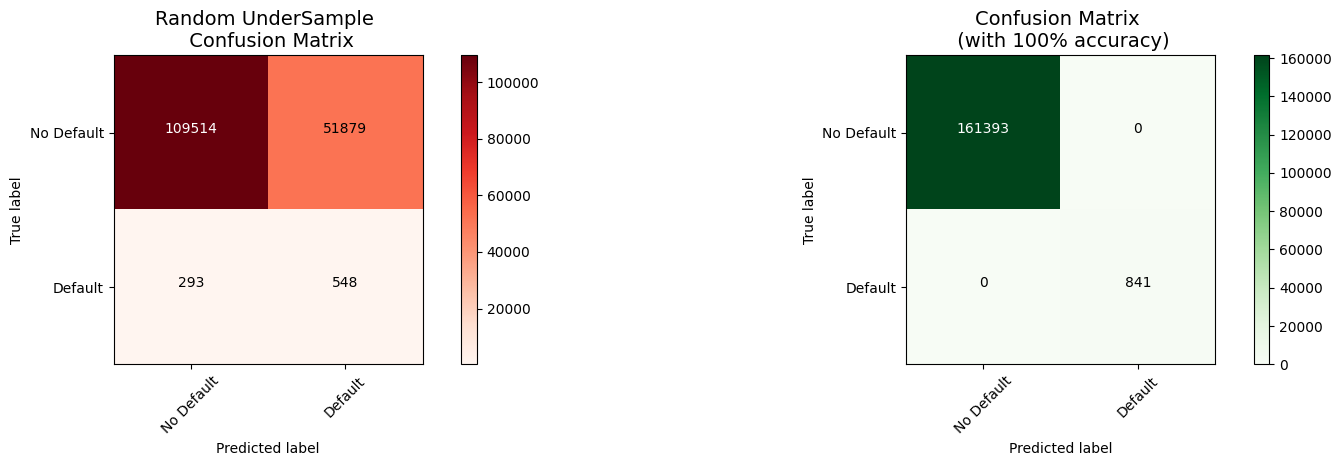

In [226]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

undersample_cm = confusion_matrix(y_test, undersample_default_predictions)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Default', 'Default']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

#### ANN with Oversampling Data

##### Model Compiling & Fitting

In [252]:
n_inputs = up_X.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
oversample_model.fit(up_X, up_y, validation_split=0.2, batch_size=300, epochs=50, shuffle=True, verbose=2)

Epoch 1/50


/Users/opal/Library/Python/3.8/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3444/3444 - 6s - loss: 0.6586 - accuracy: 0.6904 - val_loss: 0.8053 - val_accuracy: 0.5130 - 6s/epoch - 2ms/step
Epoch 2/50
3444/3444 - 5s - loss: 0.6286 - accuracy: 0.7000 - val_loss: 0.8155 - val_accuracy: 0.4868 - 5s/epoch - 1ms/step
Epoch 3/50
3444/3444 - 5s - loss: 0.5636 - accuracy: 0.7037 - val_loss: 0.8492 - val_accuracy: 0.4767 - 5s/epoch - 1ms/step
Epoch 4/50
3444/3444 - 4s - loss: 0.5549 - accuracy: 0.7084 - val_loss: 0.7879 - val_accuracy: 0.5264 - 4s/epoch - 1ms/step
Epoch 5/50
3444/3444 - 4s - loss: 0.5504 - accuracy: 0.7099 - val_loss: 0.7850 - val_accuracy: 0.5145 - 4s/epoch - 1ms/step
Epoch 6/50
3444/3444 - 4s - loss: 0.5480 - accuracy: 0.7117 - val_loss: 0.7768 - val_accuracy: 0.5391 - 4s/epoch - 1ms/step
Epoch 7/50
3444/3444 - 4s - loss: 0.5454 - accuracy: 0.7147 - val_loss: 0.7476 - val_accuracy: 0.5606 - 4s/epoch - 1ms/step
Epoch 8/50
3444/3444 - 5s - loss: 0.5431 - accuracy: 0.7167 - val_loss: 0.8009 - val_accuracy: 0.5180 - 5s/epoch - 1ms/step
Epoch 9/50
3444/344

##### Evaluation

Confusion matrix, without normalization
[[136225  25168]
 [   442    399]]
Confusion matrix, without normalization
[[161393      0]
 [     0    841]]


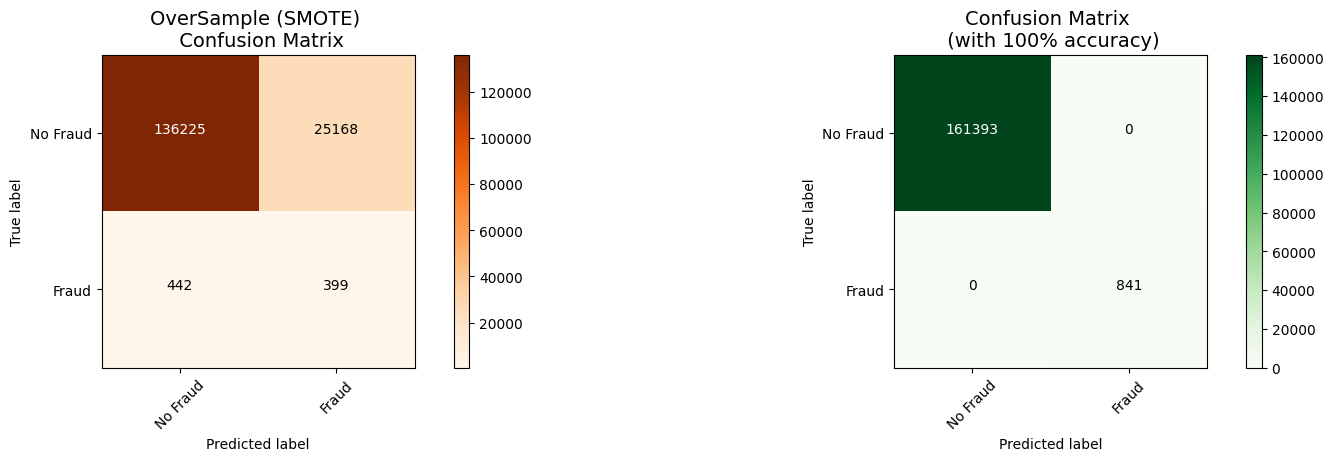

In [253]:
oversample_predictions = oversample_model.predict(scaled_X_test, batch_size=200, verbose=0)
oversample_default_predictions = np.argmax(oversample_predictions,axis=1)#classes

oversample_smote = confusion_matrix(y_test, oversample_default_predictions)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

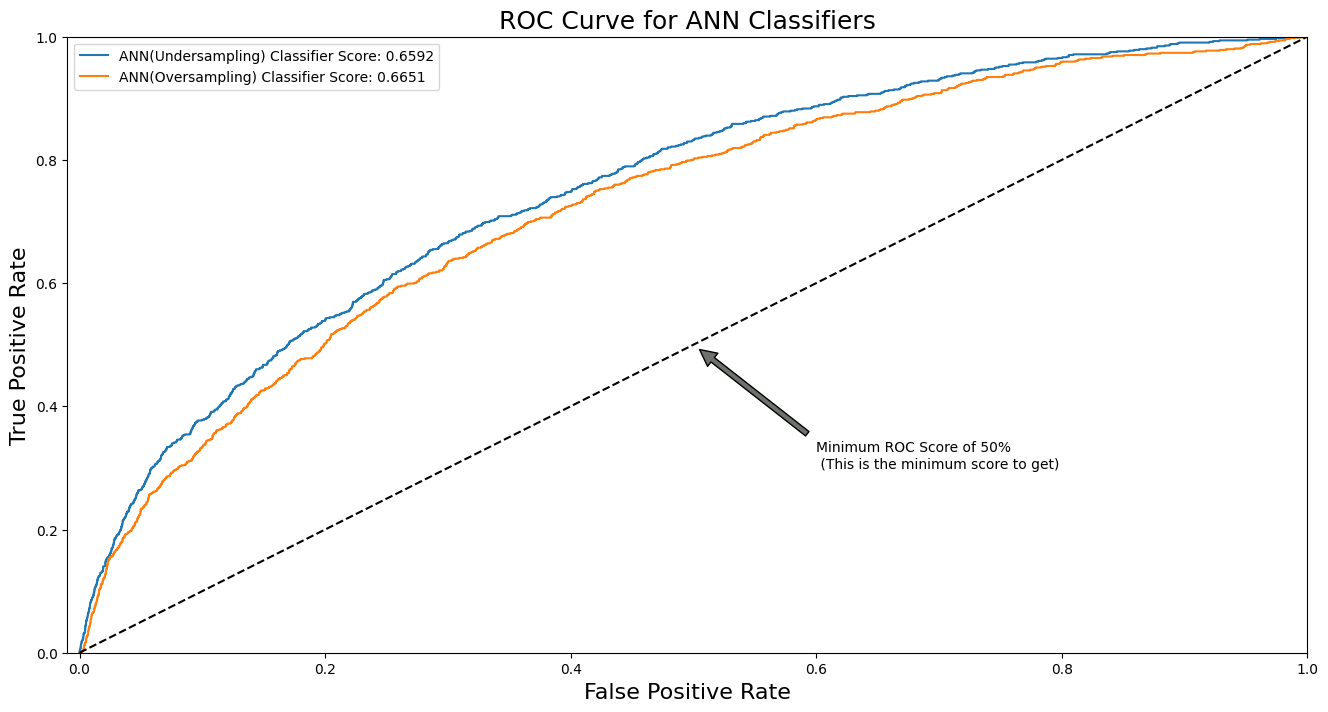

In [255]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

over_fpr, over_tpr, over_thresold = roc_curve(y_test, [probs[1] for probs in oversample_predictions])
down_fpr, down_tpr, down_threshold = roc_curve(y_test, [probs[1] for probs in undersample_predictions])

def graph_roc_curve_multiple(over_fpr, over_tpr, down_fpr, down_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve for ANN Classifiers', fontsize=18)
    plt.plot(over_fpr, over_tpr, label='ANN(Undersampling) Classifier Score: {:.4f}'.format(roc_auc_score(y_test, oversample_default_predictions)))
    plt.plot(down_fpr, down_tpr, label='ANN(Oversampling) Classifier Score: {:.4f}'.format(roc_auc_score(y_test, undersample_default_predictions)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(over_fpr, over_tpr, down_fpr, down_tpr)
plt.show()

## <span style="color:red"> Conclusion </span>

|Model Name | Sampling Method | Accuracy| AUC Score |
| ------------ | ---------- | ---- |---- |
| Logistic Regression| Undersampling| 67% | 68%|
| KNN Regression| Undersampling| 64% | 66%|
| Decision Tree| Undersampling| 74% | 70%|
| ANN| Undersampling| 68% | <span style="color:red">66%</span>|
| Logistic Regression| Oversampling| 62% | 68%|
| KNN| Oversampling| 92% | 55%|
| Decision Tree| Oversampling|  95%| 53%|
| ANN| Oversampling|  84%| <span style="color:red">67%</span>|

The presented ANN model for default detection didn't provide the expected performance gain when compared to linear benchmark models. Moreover, all four models (logistic regression, KNN, decision tree, and ANN) we trained managed to deliver decent performance than random guessing, with logistic regression achieving the best results.

In our view, there is no clear winner between these models as it is not uncommon that one model had a better AUC score while the other had a higher accuracy. Based on the presented results, it is our recommendation that researchers and practitioners should decide which performance measures are the most important ones for their use and choose the better model accordingly. 

## <span style="color:red"> Deployment </span>

The features used for training these models include:

* net working capital
* gross margin
* ROA
* ROE
* payable turnover ratio
* debt service coverage ratio
* leverage ratio

Based on the model performance and features we chose, there are some points I want to make w.r.t. the deployment process:

1. All of these features are included in financial statement, which should be accessible without worrying about any legal or ethical issues. 
2. The dataset we have here is highly imbalanced which means the models will just ignore all the defaulted examples and predict non-default for all borrowers to get higher accuracy. But the problem is partly solved by undersampling & oversampling techniques in our experiments. However, both techniques have their own disadvantages when it comes to interpreting the model performance. That is, undersampling technique helps us get higher AUC score at the cost of losing a lot of information from the dataset (in our case, using 3364 default + 3364 non-default examples) and oversampling technique helps us get higher AUC score at the cost of incorporating noisy data points (in our case, generating extra 642206 synthetic examples).
3. Deploying the model requires that we have access to those feature values, which might not be feasible when we have missing values in the holdout dataset. Our strategy for solving this type of issue is using aggregated values as proxies for missing values within the holdout dataset (which will be implemented in the harness function).

In [306]:
#save the best-performing model and scaler
import pickle
import joblib

#save model
modelname = "model.sav"
pickle.dump(log_reg, open(modelname, "wb"))

#save scaler
scalername = "scaler.sav"
joblib.dump(rob_scaler, scalername)

['scaler.sav']

## <span style="color:red"> Harness Function </span>

In [301]:
class Harness():
    def __init__(self, model, holdout_df, scaler):
        self.model = model
        self.holdout_df = holdout_df
        self.scaler = scaler

    def data_preprocessing(self):
        #extract features
        self.holdout_df["gross_margin"] = self.holdout_df["rev_operating"] - self.holdout_df["COGS"]
        self.holdout_df["payable_turnover_ratio"] = self.holdout_df["COGS"] / self.holdout_df["AP_st"]
        self.holdout_df["leverage_ratio"] = self.holdout_df["eqty_tot"] / self.holdout_df["asst_tot"]
        self.holdout_df["debt_service_coverage_ratio"] = (self.holdout_df["rev_operating"] - self.holdout_df["exp_financing"]) / self.holdout_df["debt_st"]

        features = ["wc_net", "gross_margin", "roa", "roe", "payable_turnover_ratio", "leverage_ratio", "debt_service_coverage_ratio"]
        X = self.holdout_df[features]

        #deal with missing values and infinities
        import numpy as np
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.fillna(X.mean())

        #scale the data 
        X = self.scaler.transform(X)

        return X

    def predict(self):
        X = self.data_preprocessing()
        predicted_probs = self.model.predict_proba(X)
        return [probs[1] for probs in predicted_probs]

In [303]:
#load model and scaler
model = pickle.load(open(modelname, "rb"))
scaler = joblib.load(scalername)

#execute the harness function
harness = Harness(model, holdout_df, scaler)#replace holdout_df with the holdout dataset 
PD = harness.predict()
print(PD)

/Users/opal/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
